In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Load the Dataset
df = pd.read_csv('/Users/shounak/Documents/Personal_Projects/fleet-optimization/data/modified_data.csv')
df

,extractdate,fleet,vehicle,fuel,mpg,type,dist_run,unit,distance_run,registration,odometer,product
0,2016-07-13 00:00:00,84600,GULLY TANK,7756.47,5.04,D,8604.745608,Miles,0.0,0,0,0
1,2016-07-13 00:00:00,AY61ESN,SMALL VAN,1209.89,42.50,D,11313.000000,Miles,0.0,0,0,0
2,2016-07-13 00:00:00,BD64LFP,SMALL VAN,303.33,41.00,D,2321.000000,Miles,0.0,0,0,0
3,2016-07-13 00:00:00,BD64LHW,SMALL VAN,475.13,39.32,D,3683.000000,Miles,0.0,0,0,0
4,2016-07-13 00:00:00,BF15MOV,MED VAN,753.72,28.06,D,4252.000000,Miles,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4818,0,YT64GFO,MED VAN,325.00,27.99,D,2001.000000,Miles,0.0,YT64GFO,9579,0
4819,0,4431,2 AXLE BIN,14272.07,2.08,D,6539.929775,Miles,0.0,YV15VVS,35756,0
4820,0,YX15RVE,CAR,275.09,42.61,D,2579.000000,Miles,0.0,YX15RVE,9079,0
4821,0,YX65XRN,SMALL VAN,140.92,39.45,D,893.000000,Miles,0.0,YX65XRN,11371,0


Develop a predictive model to analyze vehicle performance and optimize fleet usage, aiming to reduce idle time and improve fuel efficiency.

In [3]:
# Feature Engineering
df['fuel_efficiency'] = df['fuel'] / df['dist_run']  

In [4]:
# Encode categorical variables 
df = pd.get_dummies(df, columns=['vehicle', 'type', 'fleet'], drop_first=True)

bool_cols = df.select_dtypes(include='bool').columns
for col in bool_cols:
    df[col] = df[col].astype(int)

df

,extractdate,fuel,mpg,dist_run,unit,distance_run,registration,odometer,product,fuel_efficiency,...,fleet_YT12GUF,fleet_YT13FNG,fleet_YT64FVD,fleet_YT64FZC,fleet_YT64GCU,fleet_YT64GFO,fleet_YX15RVE,fleet_YX65XRN,fleet_YX65XRP,fleet_YY15OBT
0,2016-07-13 00:00:00,7756.47,5.04,8604.745608,Miles,0.0,0,0,0,0.901418,...,0,0,0,0,0,0,0,0,0,0
1,2016-07-13 00:00:00,1209.89,42.50,11313.000000,Miles,0.0,0,0,0,0.106947,...,0,0,0,0,0,0,0,0,0,0
2,2016-07-13 00:00:00,303.33,41.00,2321.000000,Miles,0.0,0,0,0,0.130689,...,0,0,0,0,0,0,0,0,0,0
3,2016-07-13 00:00:00,475.13,39.32,3683.000000,Miles,0.0,0,0,0,0.129006,...,0,0,0,0,0,0,0,0,0,0
4,2016-07-13 00:00:00,753.72,28.06,4252.000000,Miles,0.0,0,0,0,0.177262,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,0,325.00,27.99,2001.000000,Miles,0.0,YT64GFO,9579,0,0.162419,...,0,0,0,0,0,1,0,0,0,0
4819,0,14272.07,2.08,6539.929775,Miles,0.0,YV15VVS,35756,0,2.182297,...,0,0,0,0,0,0,0,0,0,0
4820,0,275.09,42.61,2579.000000,Miles,0.0,YX15RVE,9079,0,0.106665,...,0,0,0,0,0,0,1,0,0,0
4821,0,140.92,39.45,893.000000,Miles,0.0,YX65XRN,11371,0,0.157805,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Model Selection
X = df.drop(columns=['mpg', 'extractdate', 'registration', 'product', 'unit'])  # Features
y = df['mpg']  # Target variable

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Number of NaN values in y: 0
0        5.04
1       42.50
2       41.00
3       39.32
4       28.06
        ...  
4818    27.99
4819     2.08
4820    42.61
4821    39.45
4822    49.20
Name: mpg, Length: 4823, dtype: float64


RandomForestRegressor(random_state=42)

In [6]:
# Evaluating Model Performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

Mean Absolute Error: 1.1276849740932644
R-squared Score: 0.9318986510324094


In [12]:
# Calculating average MPG for each vehicle type
average_mpg = df.filter(like='vehicle_').mean()

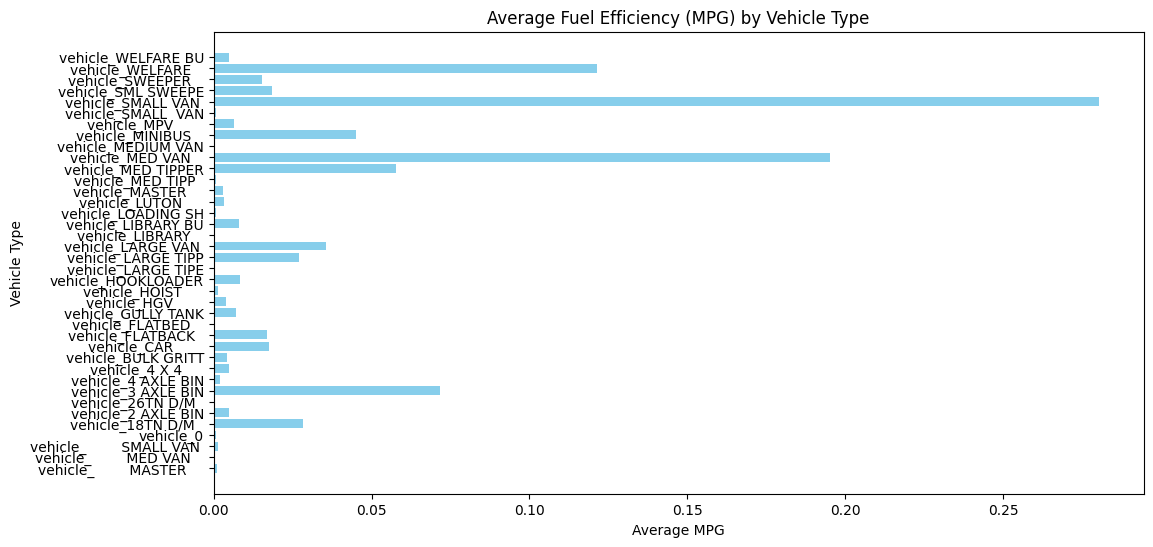

In [13]:
# DataFrame for visualization
average_mpg_df = average_mpg.reset_index()
average_mpg_df.columns = ['Vehicle Type', 'Average MPG']

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(average_mpg_df['Vehicle Type'], average_mpg_df['Average MPG'], color='skyblue')
plt.title('Average Fuel Efficiency (MPG) by Vehicle Type')
plt.xlabel('Average MPG')
plt.ylabel('Vehicle Type')
plt.show()


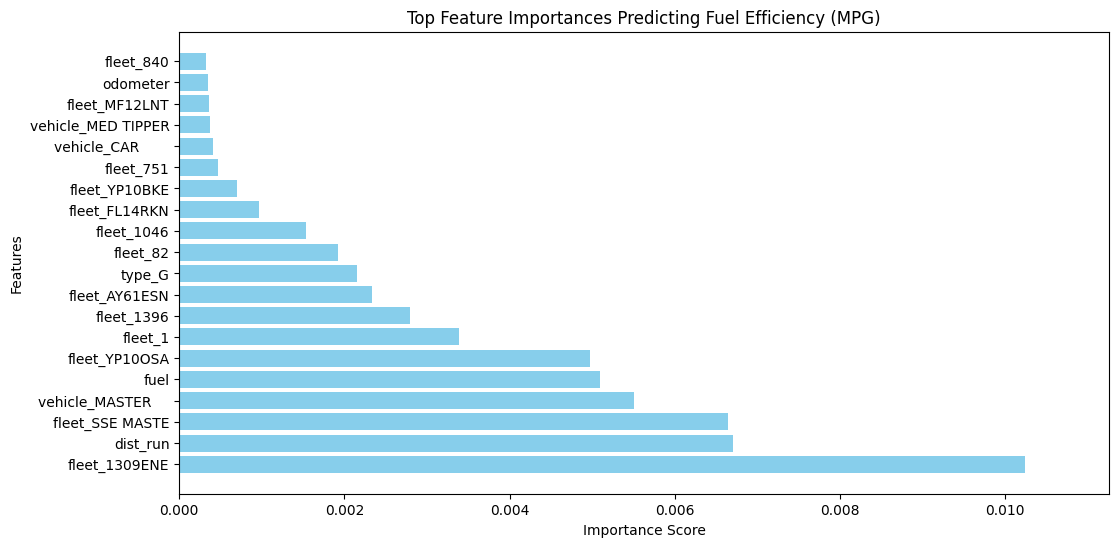

In [16]:
# Visualize Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# DataFrame for feature importances
feature_names = X.columns[indices]
importance_values = importances[indices]

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_values})

# Drop 'fuel_efficiency' from the importance DataFrame since it's obvious 
importance_df = importance_df[importance_df['Feature'] != 'fuel_efficiency']

# Selecting the top N features for visualization 
top_n = 20
top_importance_df = importance_df.head(top_n)

# Plotting the results for top features
plt.figure(figsize=(12, 6))
plt.barh(top_importance_df['Feature'], top_importance_df['Importance'], color='skyblue')
plt.title('Top Feature Importances Predicting Fuel Efficiency (MPG)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xlim(0, max(top_importance_df['Importance']) * 1.1)  # Adjust x-axis limit for better visibility
plt.show()

In [17]:
# Analising predictions vs actual values
comparison_df = pd.DataFrame({'Actual MPG': y_test, 'Predicted MPG': y_pred})
comparison_df['Difference'] = comparison_df['Actual MPG'] - comparison_df['Predicted MPG']

print("\nComparison of Actual vs Predicted MPG:")
print(comparison_df.describe())


Comparison of Actual vs Predicted MPG:
       Actual MPG  Predicted MPG  Difference
count  965.000000     965.000000  965.000000
mean    26.347161      25.891653    0.455508
std     16.879435      15.651007    4.381257
min      0.000000       0.000000  -35.695300
25%     17.170000      17.186900   -0.216000
50%     25.670000      25.080100   -0.028400
75%     35.050000      34.826600    0.018200
max    181.210000     140.395900   77.331500


In [19]:
# Identify vehicles with significant prediction errors (for further investigation)
high_error_threshold = 5  # threshold for significant error
significant_errors = comparison_df[abs(comparison_df['Difference']) > high_error_threshold]
print("\nVehicles with Significant Prediction Errors:", end='\n\n')
print(significant_errors)


Vehicles with Significant Prediction Errors:

      Actual MPG  Predicted MPG  Difference
1612       51.94        44.5785      7.3615
144        30.03        23.1231      6.9069
1322       94.34        84.4481      9.8919
3398       61.45        44.9340     16.5160
179        45.12        35.6154      9.5046
657       114.61       105.7617      8.8483
3705       49.54        30.7014     18.8386
227         9.21        15.8809     -6.6709
655        46.24        40.5951      5.6449
3700       33.95        23.9971      9.9529
4366       74.11        50.3894     23.7206
2325       45.53        26.5308     18.9992
177        72.20         4.8785     67.3215
3686       25.59        20.0023      5.5877
135        36.96        29.7698      7.1902
70         59.03        48.9116     10.1184
4821       39.45        29.0999     10.3501
1057       61.11        54.0247      7.0853
478        81.47        91.9788    -10.5088
3396       15.88        26.9716    -11.0916
1162       30.10        24.90